# Session Utilisation

Session utilisation charts are *glanceable* display that seek to communicate:

- the extent to which each driver participated in a session in terms of how many laps they completed and when;
- make stints and pit events clear;
- identify tyre use;
- identify purple, personal best and deleted laptimes.

In [2]:
#%pip install plotnine  

In [2]:
import fastf1

# Suppress info messages
fastf1.set_log_level('ERROR')

fp1 = fastf1.get_session(2024, 'Bahrain', 'FP1')
fp1.load(laps=True)

In [3]:
import fastf1.plotting
palette=fastf1.plotting.get_compound_mapping(session=fp1)
palette

{'SOFT': '#da291c',
 'MEDIUM': '#ffd12e',
 'HARD': '#f0f0ec',
 'INTERMEDIATE': '#43b02a',
 'WET': '#0067ad',
 'UNKNOWN': '#00ffff',
 'TEST-UNKNOWN': '#434649'}

In [9]:
fp1.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:23:29.480000,VER,1,NaT,1.0,1.0,0 days 00:21:31.781000,NaT,NaT,0 days 00:00:53.688000,...,True,Red Bull Racing,0 days 00:21:31.781000,2024-02-29 11:36:31.847,1,NaN,False,,False,False
1,0 days 00:25:03.380000,VER,1,0 days 00:01:33.900000,2.0,1.0,NaT,NaT,0 days 00:00:30.147000,0 days 00:00:40.365000,...,True,Red Bull Racing,0 days 00:23:29.480000,2024-02-29 11:38:29.546,1,NaN,False,,False,True
2,0 days 00:27:38.741000,VER,1,NaT,3.0,1.0,NaT,0 days 00:27:36.999000,0 days 00:00:51.006000,0 days 00:01:05.853000,...,True,Red Bull Racing,0 days 00:25:03.380000,2024-02-29 11:40:03.446,1,NaN,False,,False,False
3,0 days 00:30:09.791000,VER,1,NaT,4.0,2.0,0 days 00:28:03.285000,NaT,0 days 00:01:03.355000,0 days 00:00:54.264000,...,False,Red Bull Racing,0 days 00:27:38.741000,2024-02-29 11:42:38.807,1,NaN,False,,False,False
4,0 days 00:31:43.326000,VER,1,0 days 00:01:33.535000,5.0,2.0,NaT,NaT,0 days 00:00:29.959000,0 days 00:00:40.204000,...,False,Red Bull Racing,0 days 00:30:09.791000,2024-02-29 11:45:09.857,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0 days 01:13:18.191000,PIA,81,0 days 00:01:38.441000,21.0,3.0,NaT,NaT,0 days 00:00:31.599000,0 days 00:00:42.481000,...,False,McLaren,0 days 01:11:39.750000,2024-02-29 12:26:39.816,1,NaN,False,,False,True
445,0 days 01:14:56.712000,PIA,81,0 days 00:01:38.521000,22.0,3.0,NaT,NaT,0 days 00:00:31.560000,0 days 00:00:42.581000,...,False,McLaren,0 days 01:13:18.191000,2024-02-29 12:28:18.257,1,NaN,False,,False,True
446,0 days 01:16:35.365000,PIA,81,0 days 00:01:38.653000,23.0,3.0,NaT,NaT,0 days 00:00:31.683000,0 days 00:00:42.430000,...,False,McLaren,0 days 01:14:56.712000,2024-02-29 12:29:56.778,1,NaN,False,,False,True
447,0 days 01:18:47.934000,PIA,81,0 days 00:02:12.569000,24.0,3.0,NaT,NaT,0 days 00:00:36.175000,0 days 00:00:53.763000,...,False,McLaren,0 days 01:16:35.365000,2024-02-29 12:31:35.431,1,NaN,False,,False,True


In [96]:
fp1.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapTimeS', 'purple'],
      dtype='object')

In [33]:
fp1.laps.Compound.unique()

array(['MEDIUM', 'SOFT'], dtype=object)

In [4]:
from plotnine import ggplot, geom_point, aes

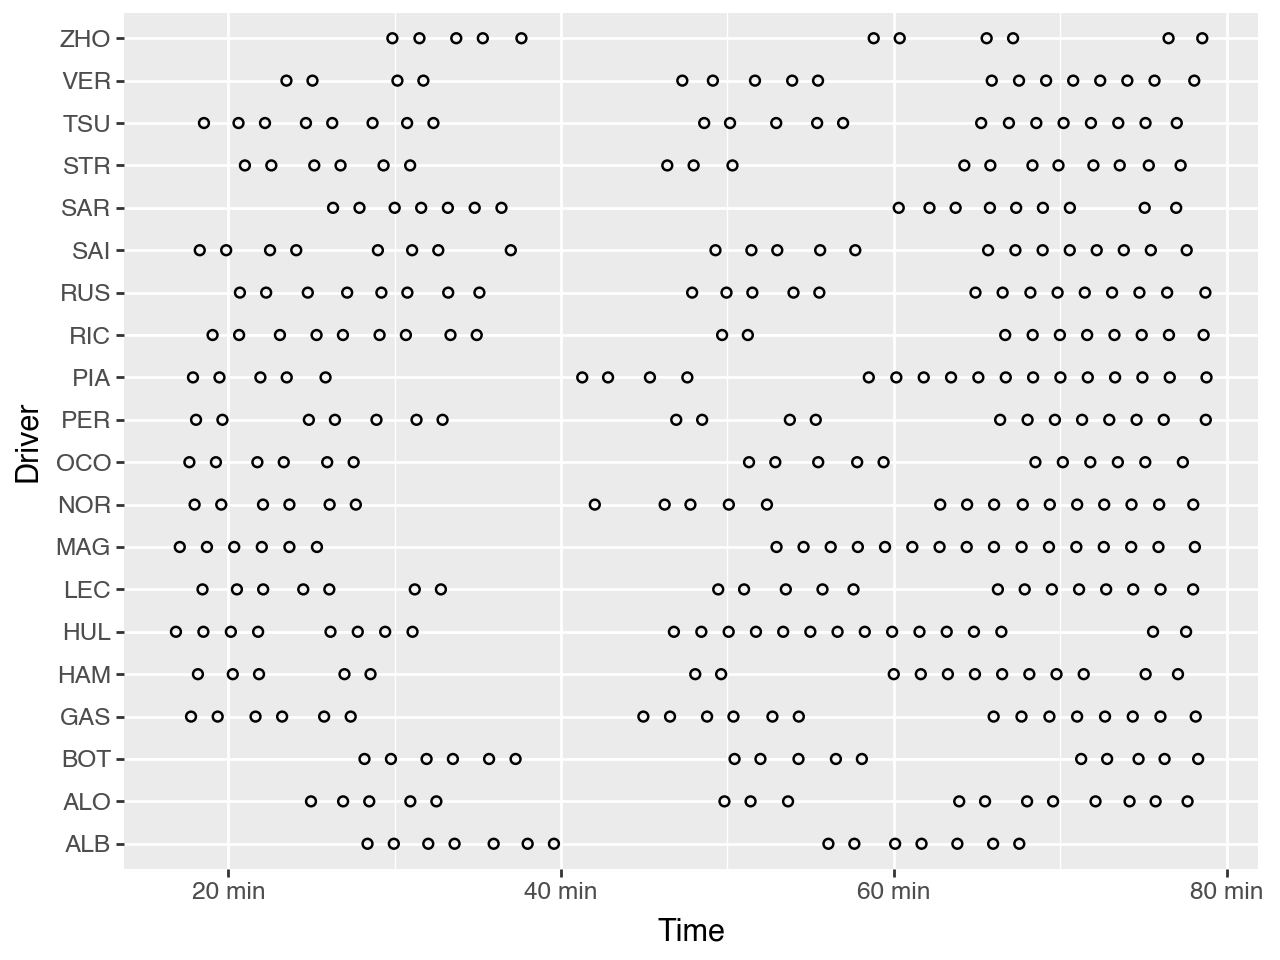

In [64]:

(
    ggplot(fp1.laps[fp1.laps['PitInTime'].isna()], aes("Time", "Driver"))
            + geom_point(fill="none")
)

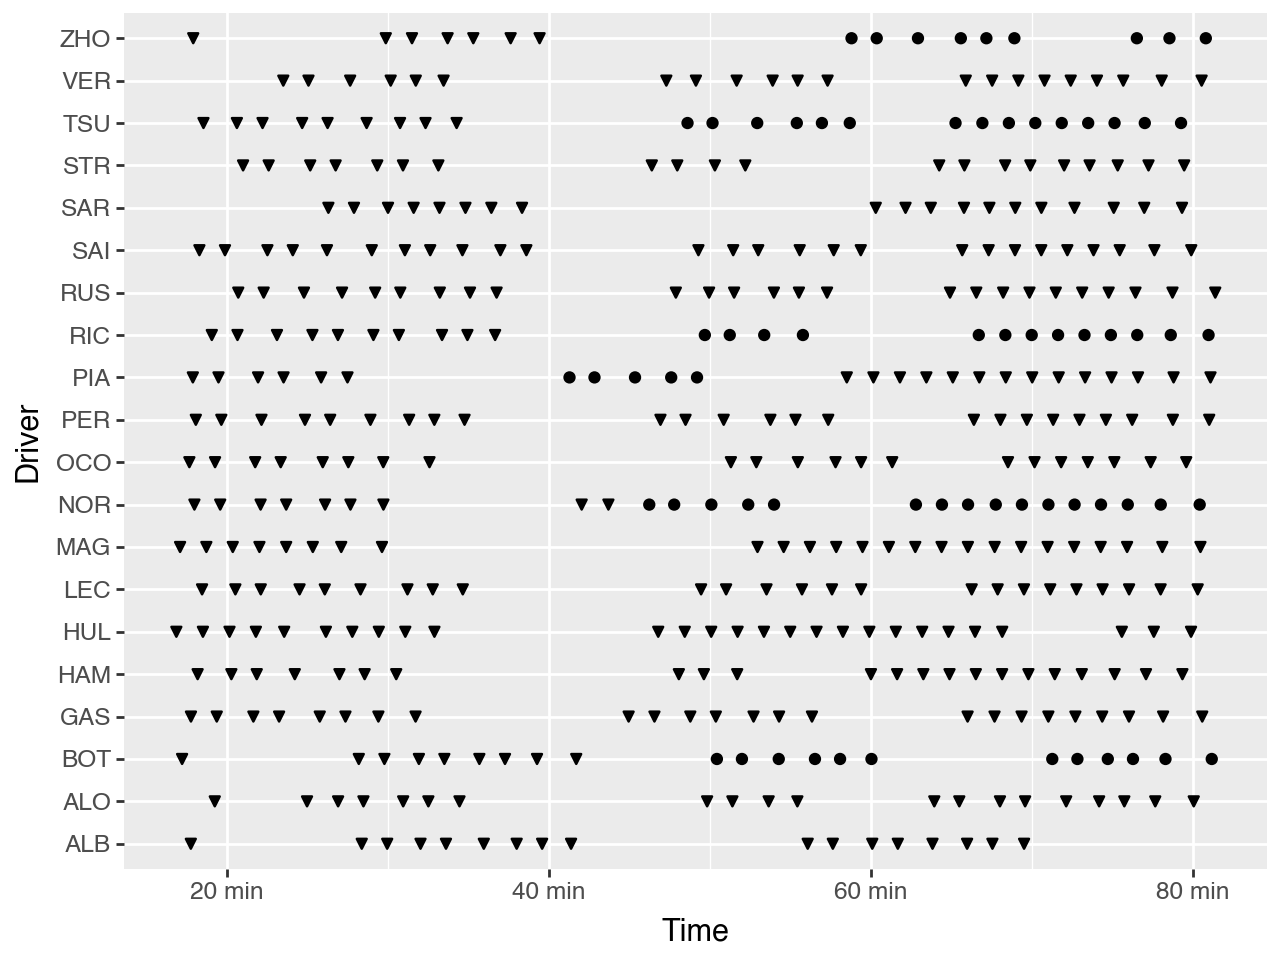

In [80]:
(
    ggplot(fp1.laps, aes("Time", "Driver"))
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='MEDIUM')], shape="v")
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='SOFT')])
)

In [22]:
def session_utilisation_chart(session):
    """
    Generate a session utilization chart for a given session.

    Parameters:
        session (object): A session object containing latpime data.

    Returns:
        plotnine.ggplot: The session utilization chart.
    """
    return (
        ggplot(session.laps, aes("Time", "Driver"))
        + geom_point(fill="none")
        + geom_point(data=session.laps[session.laps['PitInTime'].notna()])
    )

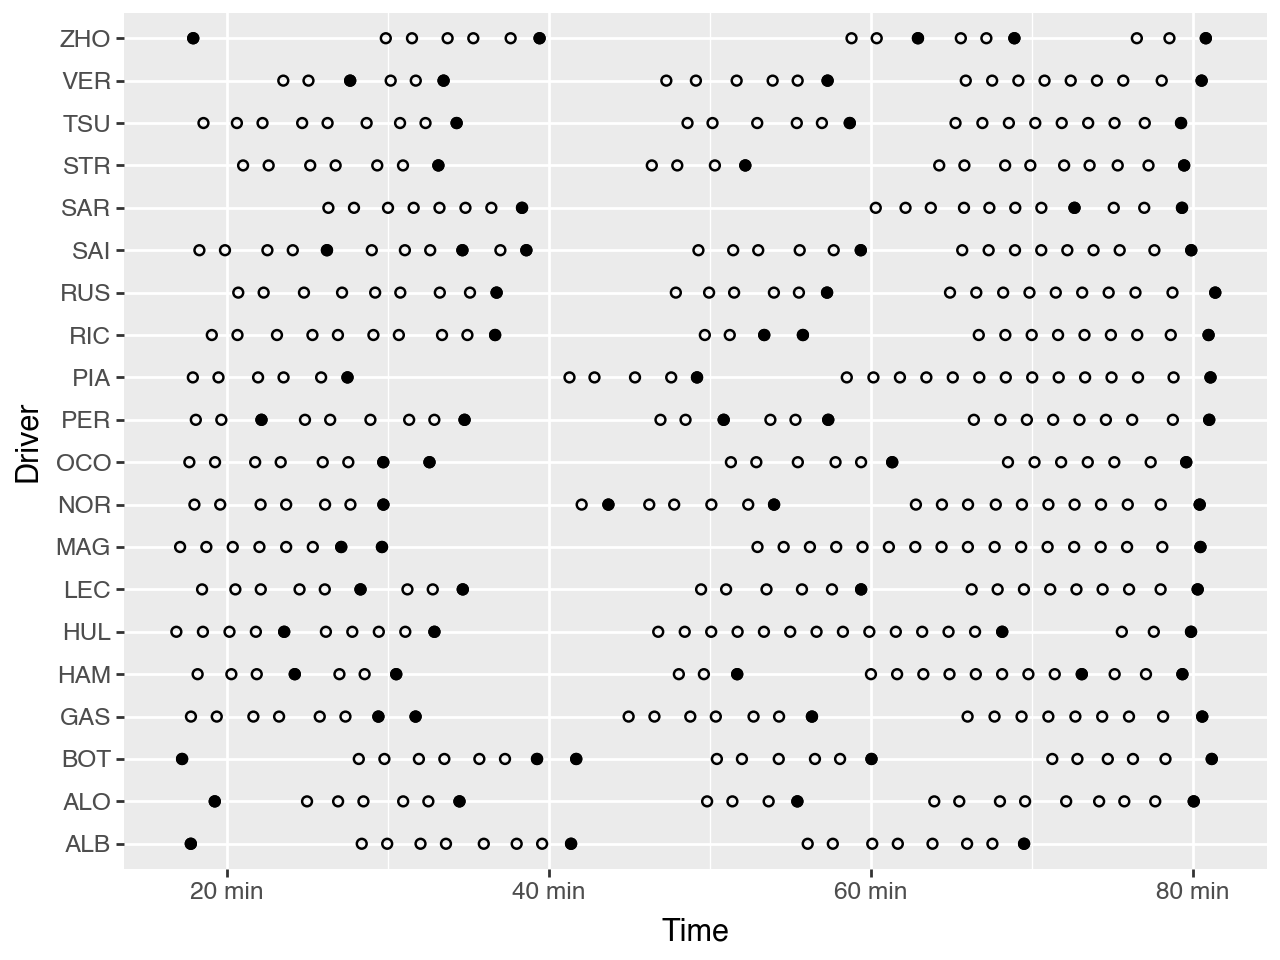

In [23]:
session_utilisation_chart(fp1)

In [31]:
from plotnine.scales.scale_shape import FILLED_SHAPES
FILLED_SHAPES

"""
o: circle
*: star
>: right pointing triangle
<: left pointing triangle
^: up pointing triangle
v: down pointing triangle
s: square
D: fat diamond
d: thin diamond
"""

{'*', '8', '<', '>', 'D', 'H', '^', 'd', 'h', 'o', 'p', 's', 'v'}

In [23]:
import numpy as np

In [110]:
fp1.laps.head(3)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeS,purple
234,0 days 00:16:50.925000,HUL,27,NaT,1.0,1.0,0 days 00:15:03.718000,NaT,NaT,0 days 00:00:46.623000,...,0 days 00:15:03.718000,2024-02-29 11:30:03.784,1,NaN,False,,False,False,NaN,False
152,0 days 00:17:04.787000,MAG,20,NaT,1.0,1.0,0 days 00:15:17.042000,NaT,NaT,0 days 00:00:50.190000,...,0 days 00:15:17.042000,2024-02-29 11:30:17.108,1,NaN,False,,False,False,NaN,False
403,0 days 00:17:12.261000,BOT,77,NaT,1.0,1.0,0 days 00:15:05.587000,0 days 00:17:10.290000,NaT,0 days 00:00:52.435000,...,0 days 00:15:05.587000,2024-02-29 11:30:05.653,1,NaN,False,,False,False,NaN,False


In [109]:
# Enrichment

# Sort DataFrame by eventTime
fp1.laps.sort_values(by='Time', inplace=True)
# Compute cumulative minimum on lapTime while treating NaNs as large values
fp1.laps['LapTimeS'] = fp1.laps['LapTime'].dt.total_seconds()
lap_times = fp1.laps['LapTimeS'].fillna(np.inf)
cumulative_min = lap_times.cummin()

# Set 'purple' flag where lapTime matches the cumulative minimum and is not null
fp1.laps['Purple'] = (fp1.laps['LapTimeS'] == cumulative_min) & fp1.laps['LapTime'].notnull()


In [135]:
import pandas as pd

In [194]:
# Create a fastf1 enrichmaents package


LAP_STATUS_COLOURS = {"deleted":'red',
                      "inlap":'black',
                      'outlap':'black',
                      'purple':'purple',
                      'green':'green',
                      '':'black'}
# e.g. the old refinements notebook
def enrich_laps(laps, use_purple=True):
    """
    Enrich lap times with inplace additions:
    
    - purple lap (Boolean)
    - timingStatus (deleted, purple, green (personalBest), inLap, outLap)
    """
    def set_timing_status(row):
        if row['Deleted']: 
            return 'deleted'
        elif pd.notnull(row['PitInTime']):
            return 'inlap'
        elif pd.notnull(row['PitOutTime']):
            return 'outlap'
        # Guard against an unenriched laps dataframe
        elif use_purple and 'Purple' in row and row['Purple']:
            return 'purple'
        elif row['IsPersonalBest']:
            return 'green'
        return ''  # Default case (if none of the conditions match)
    

    original_index = laps.index
    laps.sort_values(by='Time', inplace=True)

    # LapTimeS columns
    laps['LapTimeS'] = laps['LapTime'].dt.total_seconds()

    # Purple column
    lap_times = laps['LapTimeS'].fillna(np.inf)
    cumulative_min = lap_times.cummin()
    # Set 'Purple' flag where lapTime matches the cumulative minimum and is not null
    laps['Purple'] = (laps['LapTimeS'] == cumulative_min) & laps['LapTime'].notnull()

    # TimingStatus
    laps['TimingStatus'] = laps.apply(set_timing_status, axis=1)
    
    # Reset laps dataframe order
    laps = laps.sort_index(inplace=True)

In [174]:
enrich_laps(fp1.laps)
fp1.laps.head(3)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeS,purple,Purple,TimingStatus
0,0 days 00:23:29.480000,VER,1,NaT,1.0,1.0,0 days 00:21:31.781000,NaT,NaT,0 days 00:00:53.688000,...,1,NaN,False,,False,False,NaN,False,False,outlap
1,0 days 00:25:03.380000,VER,1,0 days 00:01:33.900000,2.0,1.0,NaT,NaT,0 days 00:00:30.147000,0 days 00:00:40.365000,...,1,NaN,False,,False,True,93.9,True,True,purple
2,0 days 00:27:38.741000,VER,1,NaT,3.0,1.0,NaT,0 days 00:27:36.999000,0 days 00:00:51.006000,0 days 00:01:05.853000,...,1,NaN,False,,False,False,NaN,False,False,inlap


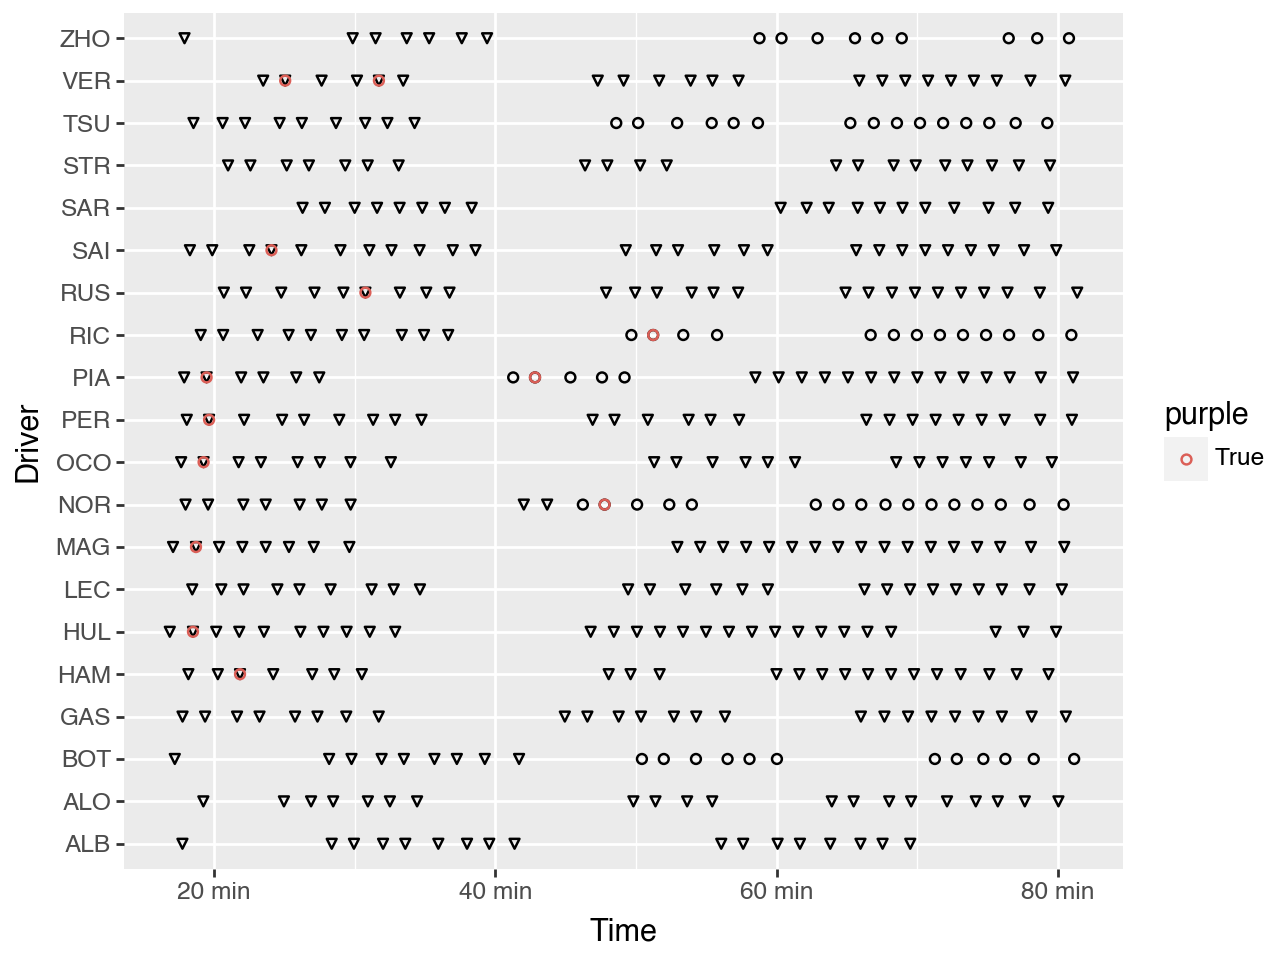

In [111]:
# Need a mapping of tyre type to shape
(
    ggplot(fp1.laps, aes("Time", "Driver"))
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='MEDIUM')], fill="none", shape="v")
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='SOFT')], fill="none")
    + geom_point(fp1.laps[(fp1.laps['Purple'])], aes(color='purple'), fill="none")
)

In [ ]:
# Need to identify in lap at least
# No fill allos us to do a dot in the middle
# to denote came in at end of that lap

In [239]:
from plotnine import geom_rect, scale_y_discrete, scale_color_manual
from plotnine import guides

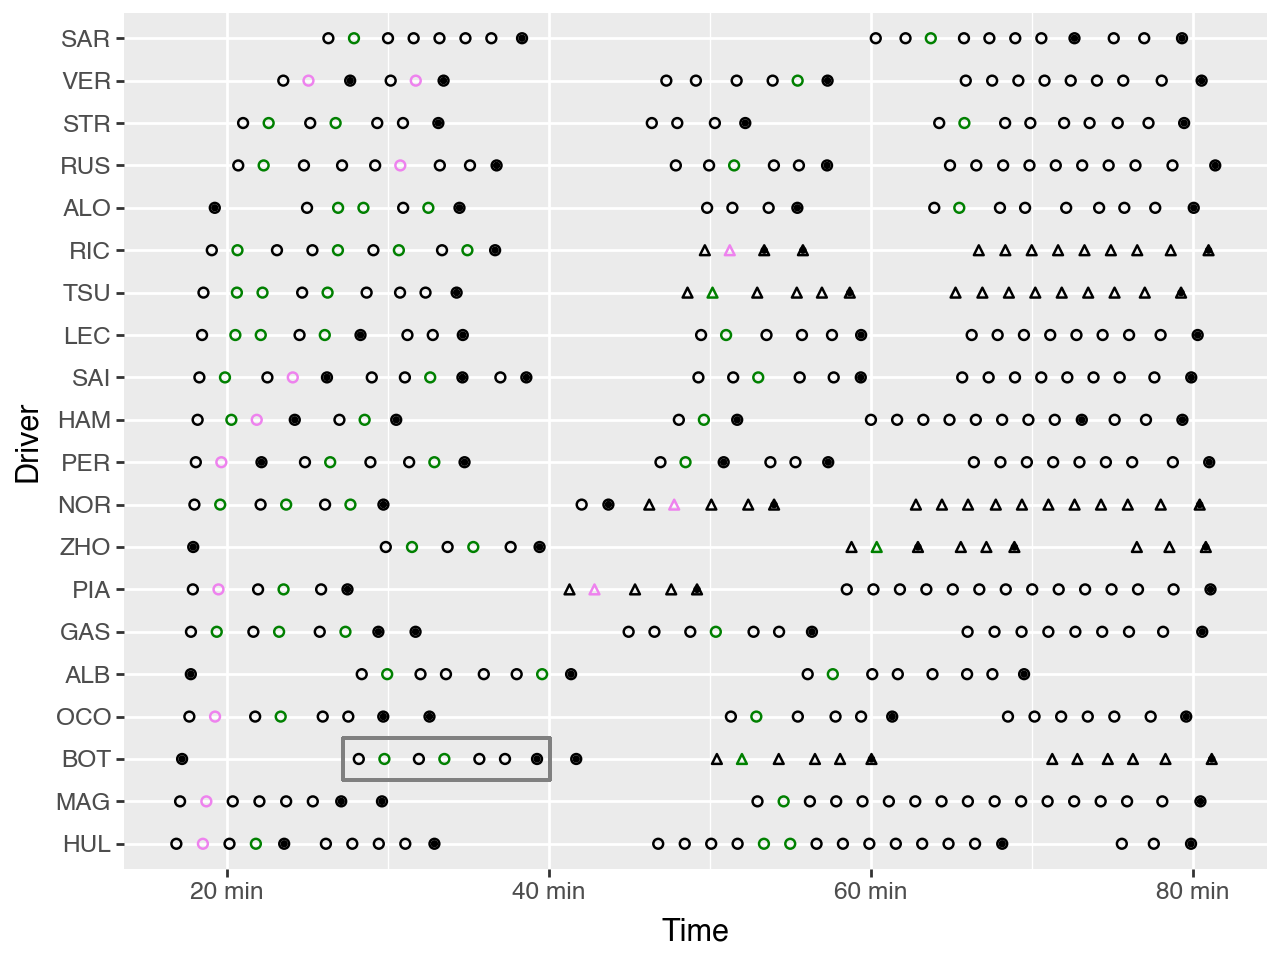

In [129]:
# Build up the plot over several statements
is_personal_best = fp1.laps['IsPersonalBest']
is_purple = fp1.laps['Purple']
T = {"MEDIUM":"o", "SOFT":"^"}

g = (
    ggplot(fp1.laps, aes("Time", "Driver",
                         #, color="Compound"
                        ))
    
    #+  geom_point(data=fp1.laps[(fp1.laps['Compound']=='MEDIUM')],fill="none", shape="v")
    #+  geom_point(data=fp1.laps[(fp1.laps['Compound']=='SOFT')],fill="none")
    #+ scale_color_manual({"MEDIUM":'red', "SOFT":'lightblue'})
)
# Have a LAP_TIMING_STATUS column:
# DELETED (grey / red)
# OVERALL_FASTEST (purple)
# PERSONAL_FASTEST (green)
# STANDARD_LAP (black / yellow)
# OUTLAP (black?)
# INLAP (black?)
for c in fp1.laps['Compound'].unique():
    is_compound = fp1.laps['Compound']==c
    g = g +  geom_point(data=fp1.laps[is_compound & ~is_personal_best ],fill="none", shape=T[c])
    g = g + ( geom_point(fp1.laps[is_compound & (is_personal_best) & ~is_purple], fill="none", color='green', shape=T[c]))
    g = g + ( geom_point(fp1.laps[is_compound & is_purple], fill="none", color='violet',shape=T[c]))
g = g + ( geom_point(fp1.laps[fp1.laps['PitInTime'].notnull()], fill="none", shape='.'))

#Start to explore how we can add a box to highlight a particular region


def session_highlight_box(driver, stint):
    # Set this as half the mean laptime?
    lap_margin_s=fp1.laps.LapTime.median()/2
    #pd.Timedelta(seconds=30)

    _driver = fp1.laps.Driver.unique().tolist().index(driver)+1
    driver_laps = fp1.laps.pick_drivers(driver)

    return (geom_rect(
    aes(
      # Need to 
      ymin = _driver - 0.5, # Left edge of the box
      ymax = _driver + 0.5, # Right edge of the box
      # Also need to get stint in an out times
      # then add a default/configurable time margin
      xmin = driver_laps[driver_laps.Stint==stint].PitOutTime.iloc[0] + lap_margin_s, # Bottom edge of the box
      xmax = driver_laps[driver_laps.Stint==stint].PitInTime.iloc[-1] + lap_margin_s # Top edge of the box
    ),
    fill = None,  # No fill inside the box
    color = "grey", # Border color
  ))

g + session_highlight_box("BOT", 2) + scale_y_discrete(limits = fp1.laps.Driver.unique())

In [127]:
fp1.laps.Driver.unique().tolist().index('BOT')

2

In [126]:
np.where(fp1.laps.Driver.unique() == 'MAG')[0][0]

np.int64(1)

In [137]:
bot = fp1.laps.pick_drivers('BOT')
bot[bot.Stint==2].PitOutTime.iloc[0], bot[bot.Stint==2].PitInTime.iloc[-1]

(Timedelta('0 days 00:26:21.046000'), Timedelta('0 days 00:39:13.447000'))

In [240]:
class SessionUtilisation:
    """
    Class for generating a session utilisation chart.
    Pass in either a session object or a laps dataframe.
    """
    def __init__(self, session, order=None, reverse=False):
        if isinstance(session, fastf1.core.Session):
            self.session = session
            self.laps = self.session.laps
        elif isinstance(session, pd.DataFrame):
            # Assume for now its a laps object; or we could test cols 
            self.session = None
            self.laps = session
        else:
            # TO DO should raise and error?
            pass
        self.order = "accession" if order is None else order
        self.lap_margin_s=self.laps.LapTime.median()/2
  
        # By default: self.order=="accession":
        self.driver_order = self.get_driver_order("Time")
        if self.order != "accession":
            if isinstance(order, str) and order in self.laps.columns:
                # Sort by single laps column name
                self.driver_order = self.get_driver_order(order)
            elif isinstance(order, list):
                # If the list members are laps columns, sort on those
                if set(order).issubset(set(self.laps.columns)):
                    self.driver_order = self.get_driver_order(order)
                # If the list members are driver labels, sort on those
                elif set(order).issubset(set(self.laps.Driver.unique())):
                    self.driver_order = order
        if reverse:
            self.driver_order.reverse()

            
    def get_driver_order(self, order=None):
        """
        Sort the session laps to give the required shape for plotting.
        Also sets the driver_order list for axis labeling.
        
        Parameters:
            order (string, list, optional): The column we want to sort on.
        """
        order = order if order else self.order
        # Sort laps dataframe by provided columns
        self.laps.sort_values(by=order, inplace=True)
        driver_order = self.laps.Driver.unique().tolist()
        self._reset_order()
        return driver_order
        
    def _reset_order(self, order=None):
        """ Reset the order of session.
            Default is index order.
            If passed a list of index vals of same length as dataframe,
            use that as the sort order.
            TO DO: if passed a string or list of strings that match column names,
            sort on that."""
        if order is None:
            self.laps.sort_index(inplace=True)
        elif isinstance(order, list) and len(order)==len(self.session.laps):
            # TO DO - use a dummy sort_values column to sort inplace
            return self.laps.reindex(order)
    
    def base_chart(self):
        """
        Generate a session utilization chart for a given session.
    
        Parameters:
            session (object): A session object containing enriched lapime data.
    
        Returns:
            plotnine.ggplot: The session utilization chart.
        """

        # TO DO  - if not enriched, enrich it...
        is_personal_best = self.laps['IsPersonalBest']
        is_purple = self.laps['Purple']
        T = {"MEDIUM":"o", "SOFT":"^"}
        
        # Sort the laps dataframe as required
        
        g = (
            ggplot(self.laps, aes("Time", "Driver", color = "TimingStatus"))
            #+ geom_point(fill="none")
           )

        for c in self.laps['Compound'].unique():
            is_compound = self.laps['Compound']==c
            g = g +  geom_point(data=self.laps[is_compound & ~is_personal_best ],fill="none", shape=T[c])
            g = g + ( geom_point(self.laps[is_compound & (is_personal_best) & ~is_purple], fill="none", color='green', shape=T[c]))
            g = g + ( geom_point(self.laps[is_compound & is_purple], fill="none", color='violet',shape=T[c]))

        # Add in-lap indicator
        g = g + geom_point(data=self.laps[self.laps['PitInTime'].notna()], size=0.1, color="blue")
        # Drop the legend for the color
        g = g + guides(color = "none")
        #TO DO purple etc
        g = g + scale_color_manual(LAP_STATUS_COLOURS)
        g = g + scale_y_discrete(limits = self.driver_order)
        
        return g

    def session_highlight_box(self, driver, stint):
        _driver = self.driver_order.index(driver)+1
        driver_laps = self.laps.pick_drivers(driver)
    
        box =  (geom_rect(
        aes(
          # Need to 
          ymin = _driver - 0.5, # Left edge of the box
          ymax = _driver + 0.5, # Right edge of the box
          # Also need to get stint in an out times
          # then add a default/configurable time margin
          xmin = driver_laps[driver_laps.Stint==stint].PitOutTime.iloc[0] + self.lap_margin_s, # Bottom edge of the box
          xmax = driver_laps[driver_laps.Stint==stint].PitInTime.iloc[-1] + self.lap_margin_s, # Top edge of the box
        ),
        fill = None,  # No fill inside the box
        color = "grey", # Border color
      ))

        return box

In [241]:
type(fp1)

fastf1.core.Session

In [242]:
su = SessionUtilisation(fp1, order="Time", reverse=True)

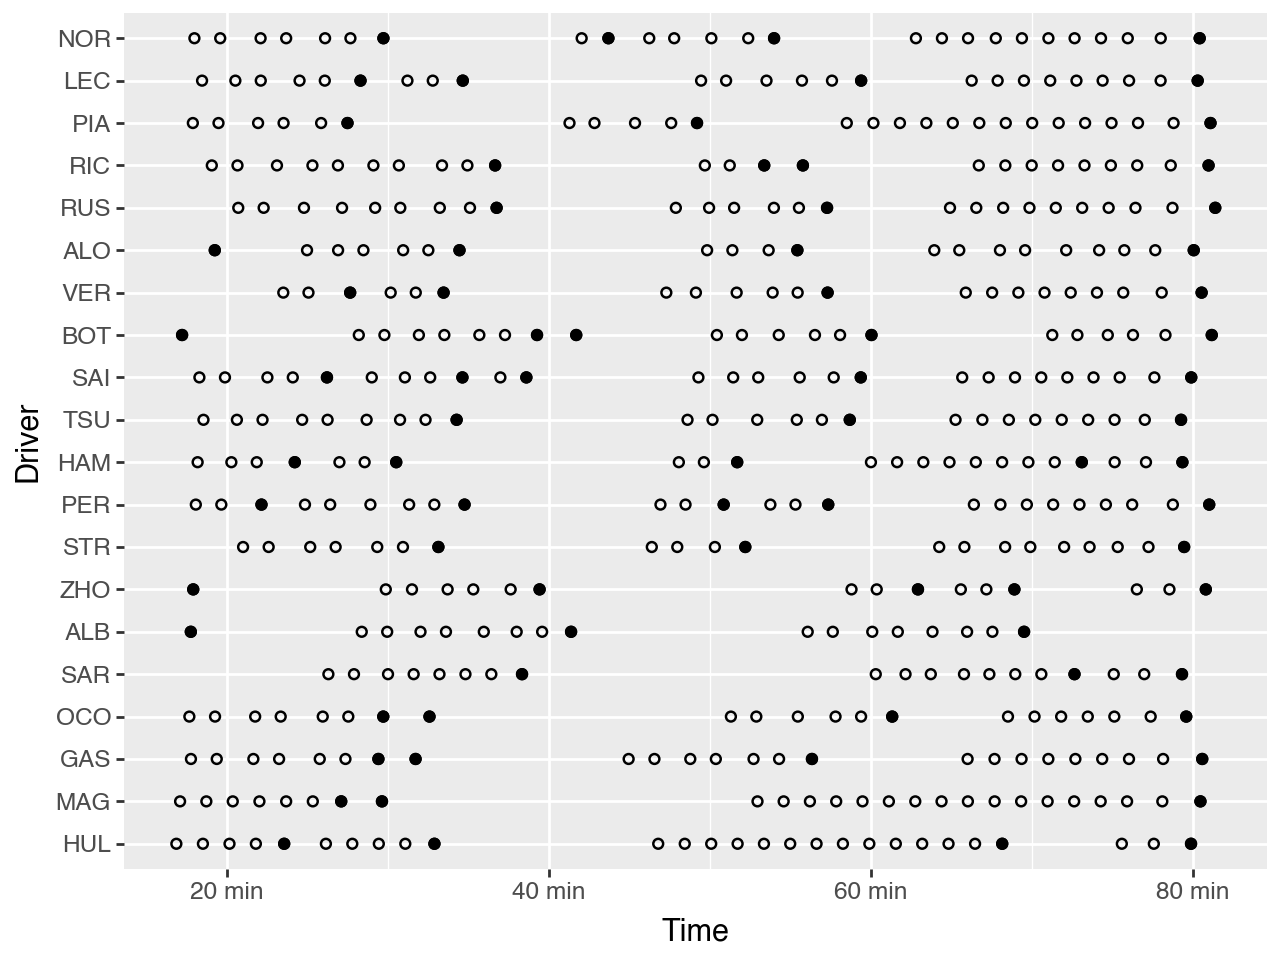

In [243]:
su.base_chart()

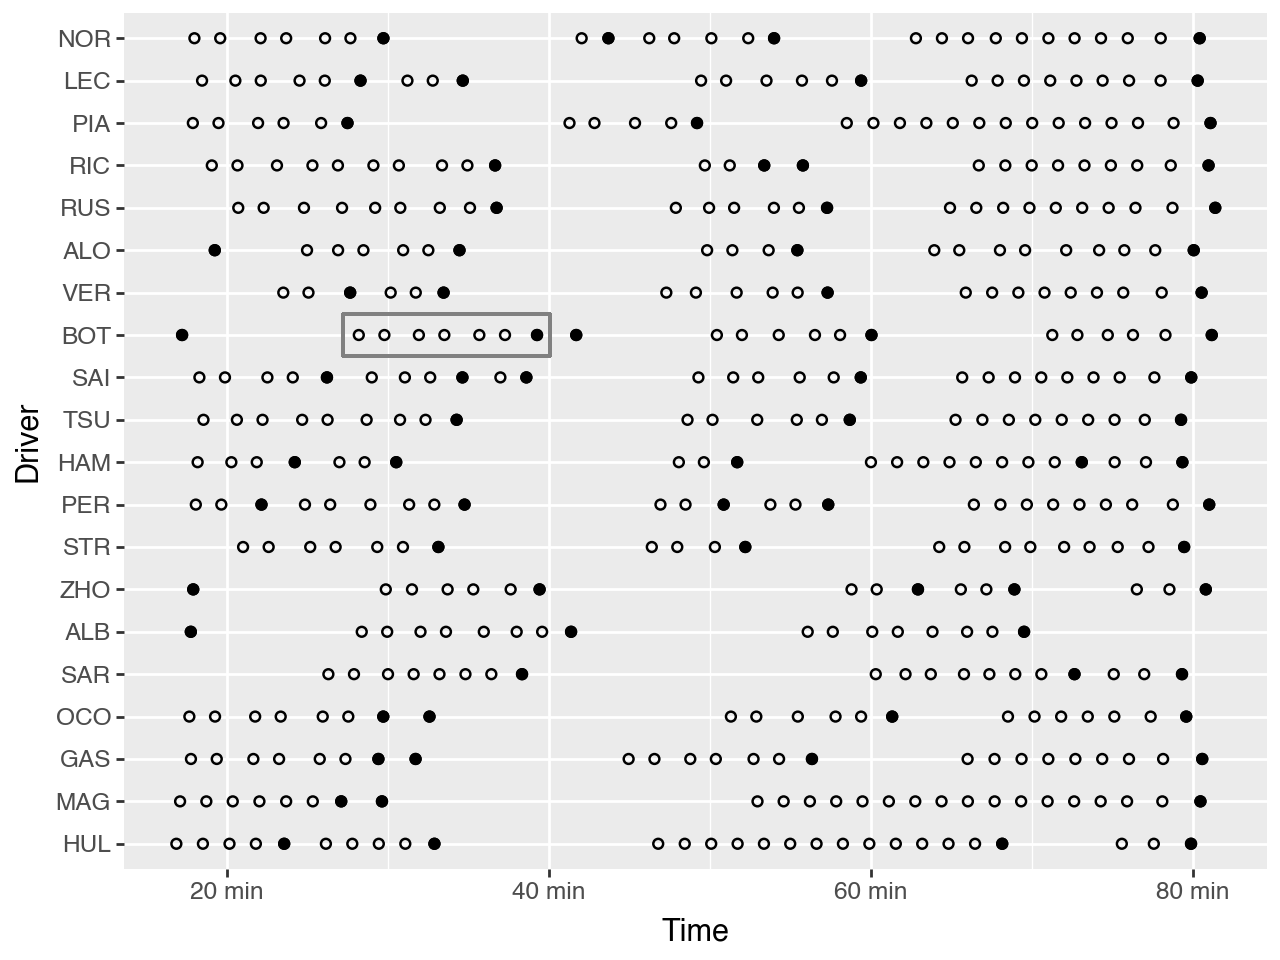

In [244]:
su.base_chart() + su.session_highlight_box("BOT", 2)